1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import integrate

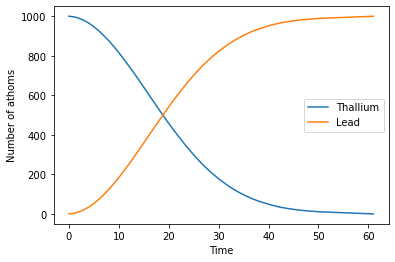

In [30]:
def p_t(t, tao = 3.052*60):
    return 1 - 2**-(t/tao)
     

Thallium = 1000
Lead = 0
T = []
L = []
T.append(Thallium)
L.append(Lead)
i = 1

while Thallium > 0:
    decade = int(Thallium*p_t(i))
    if decade==0: decade=1
    Thallium = Thallium - decade
    Lead = Lead + decade
    T.append(Thallium)
    L.append(Lead)
    i += 1
    
    

x = np.arange(0,i)
plt.plot(x,T, label = "Thallium")
plt.plot(x,L, label = "Lead")
plt.xlabel("Time")
plt.ylabel("Number of athoms")
plt.legend()


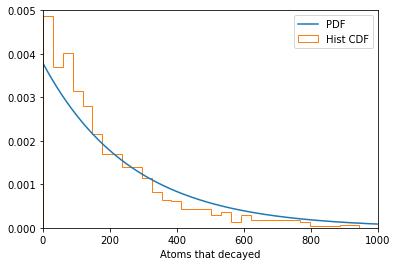

In [61]:
def p_pdf(t, tao = 3.052*60):
    """PDF of exponential distribution."""
    return 2**(-(t/tao))*(np.log(2)/tao)

def p_cdf(t, tao = 3.052*60):
    """CDF of exponetial distribution."""
    return 1 - 2**(-t*tao)

def p_icdf(y, tao = 3.052*60):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1 - y)*tao


x = np.random.random(1000)
v = p_icdf(x) # apply the inverse of the CDF

pdf = p_pdf(np.arange(0,1000))

plt.plot(np.arange(0,1000), pdf, label="PDF")
h, bins, _ = plt.hist(v, histtype = 'step', bins=50, density=True, label="Hist CDF")
plt.axis([0, 1000, 0, 0.005])
plt.xlabel("Atoms that decayed")
plt.legend()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

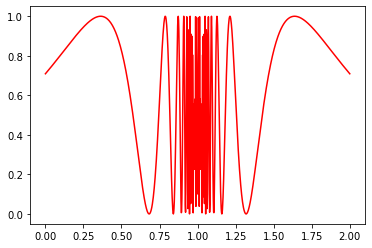

In [116]:
def f(x):
    return np.sin(1/(1-x))**2

def hit_miss(x):
    # Monte Carlo integration
    N = 1000
    
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / N
    return I

def mean_value(r_i):
    V = 2
    N = 1000
    sum = 0
    for i in r_i:
        sum += f(i)
    
    I = V/N * sum
    return I

def results(I):
    I = np.array(I)
    I_mean = I.mean()
    err = I.std()
    
    return I_mean, err
    
    
x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')
integrals_hit = []
N = 100

for i in range(N):
    I = hit_miss(x)
    integrals_hit.append(I)
    


In [117]:

I_hit, err_hit = results(integrals_hit)

print("The results of the integrals with the hit/miss method is:\n %.3f with err +- %.3f" % (I_hit, err_hit))



The results of the integrals with the hit/miss method is:
 1.347 with err +- 0.023


In [118]:

integrals_mean = []

for i in range(N):
    r_i = np.random.uniform(0,2,1000)
    I = mean_value(r_i)
    integrals_mean.append(I)
    
I_mean, err_mean = results(integrals_mean)
    
print("The results of the integrals with the mean/value method is:\n %.3f with err +- %.3f" % (I_mean, err_mean))

The results of the integrals with the mean/value method is:
 1.350 with err +- 0.021


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [135]:
def f(x,y):
    if (x**2 + y**2) <= 1:
        return 1
    else:
        return 0
    
def hit_miss_2dim(x,y):
    N = 1000
    
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x,y): count += 1
    I = 2 * count / N
    return I

def mean_value_2dim(x_i,y_i):
    V = 2
    N = 1000
    sum = 0
    for x,y in zip(x_i,y_i):
        sum += f(x,y)
    
    I = V/N * sum
    return I
    
x = y = np.random.uniform(-1,1,1000)

area = []
N = 100

for i in range(N):
    I = mean_value_2dim(x,y)
    area.append(I)
    
A, _ = results(area)

print(A)


1.3600000000000003


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.